# Sep ??th, 2021

**Motivation**: Using N = 404 ROIs. Different group aggregation <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(32), load_preproc=True)

In [3]:
from register.register import *

In [4]:
reg = Register(mice)

In [21]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

In [ ]:
for key, anat in tqdm(mice.T1w.items()):
    indiv = mice.T1w[key].get_data()
    indiv = reg._prepare(indiv)
    
    df_tx, best_tx, perf = reg.fit_register(
        name='a',
        mode='3d',
        fixed=indiv,
        moving=reg.nissl,
        save_results=False,
        grads=list(np.linspace(0.01, 0.8, 21)),
        types=['SyN', 'ElasticSyN'],
        bins=[8, 12, 16, 20, 24, 30],
        n_seeds=5,
    )
    _df = df_tx.groupby(['type', 'bins', 'grad']).mean().drop(columns=['seed']).unstack()
    fig, ax = create_figure(1, 1)
    sns.lineplot(
        data=_df.stack().reset_index(),
        x='grad',
        y='perf',
        hue='bins',
        style='type',
        palette='deep',
        ax=ax,
    )
    ax.set_title(key)
    print('\n')
    
    iso_yale = ants.apply_transforms(
        fixed=indiv,
        moving=iso,
        transformlist=best_tx['fwdtransforms'],
        interpolator='genericLabel',
    )
    indiv.plot(
        overlay=iso_yale,
        axis=0,
        overlay_alpha=0.6,
        overlay_cmap='Reds',
        nslices=49,
        figsize=1,
        filename=pjoin(tmp_dir, 'register_quality', f"direct_{key}.png"),
    )

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed           4
grad      0.2865
bins          30
type         SyN
perf    0.534479

  3%|▎         | 1/30 [1:44:00<50:16:02, 6240.10s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed             8
grad        0.1285
bins             8
type    ElasticSyN
perf      0.563793

  7%|▋         | 2/30 [3:17:47<45:43:57, 5879.91s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed             2
grad         0.168
bins             8
type    ElasticSyN
perf      0.552065

 10%|█         | 3/30 [4:53:12<43:34:07, 5809.17s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed            16
grad        0.1285
bins            30
type    ElasticSyN
perf       0.55878

 13%|█▎        | 4/30 [6:28:34<41:42:23, 5774.76s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed             1
grad         0.089
bins            24
type    ElasticSyN
perf      0.556676

 17%|█▋        | 5/30 [8:02:54<39:48:55, 5733.42s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed             1
grad        0.2865
bins            30
type    ElasticSyN
perf      0.558719

 20%|██        | 6/30 [9:37:35<38:06:14, 5715.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed           4
grad       0.168
bins          30
type         SyN
perf    0.541373

 23%|██▎       | 7/30 [11:17:25<37:05:18, 5805.14s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed           8
grad       0.168
bins          30
type         SyN
perf    0.534723

 27%|██▋       | 8/30 [12:54:24<35:30:11, 5809.60s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed           2
grad       0.089
bins           8
type         SyN
perf    0.534268

 30%|███       | 9/30 [14:34:46<34:16:33, 5875.90s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed             2
grad         0.168
bins            24
type    ElasticSyN
perf      0.549225

 33%|███▎      | 10/30 [16:13:20<32:42:37, 5887.87s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed          16
grad       0.089
bins          20
type         SyN
perf    0.553432

 37%|███▋      | 11/30 [17:51:31<31:04:46, 5888.77s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed          8
grad      0.089
bins         30
type        SyN
perf    0.54471

 40%|████      | 12/30 [19:38:52<30:16:58, 6056.61s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed            16
grad         0.089
bins            12
type    ElasticSyN
perf      0.548744

 43%|████▎     | 13/30 [21:33:49<29:48:12, 6311.32s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed           4
grad       0.326
bins          30
type         SyN
perf    0.537703

 47%|████▋     | 14/30 [23:26:16<28:38:07, 6442.95s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df_tx, best_tx, perf = reg.fit_register(
    name='a',
    mode='3d',
    fixed=indiv,
    moving=reg.nissl,
    save_results=False,
    grads=[np.round(e, 2) for e in np.linspace(0.01, 0.3, 16)],
    types=['SyN', 'ElasticSyN'],
    bins=[16, 20, 24, 30],
    n_seeds=5,
)

0it [00:00, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:

_df

In [ ]:
sns.lineplot(
    data=_df.stack().reset_index(),
    x='grad',
    y='perf',
    hue='bins',
    style='type',
    palette='deep',
)

<AxesSubplot:xlabel='grad', ylabel='perf'>

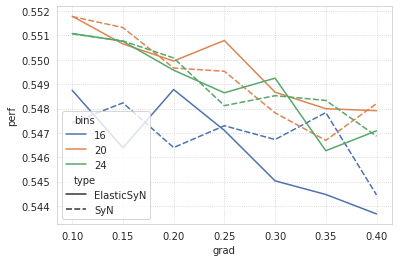

In [9]:
sns.lineplot(
    data=_df.stack().reset_index(),
    x='grad',
    y='perf',
    hue='bins',
    style='type',
    palette='deep',
)

In [ ]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

iso_yale = ants.apply_transforms(
    fixed=indiv,
    moving=iso,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)

In [ ]:
indiv.plot(
    overlay=iso_yale,
    axis=0,
    overlay_alpha=0.6,
    overlay_cmap='Reds',
    nslices=49,
    figsize=1,
    filename='direct.png',
)

In [ ]:
tx = reg.load_tx(key, '3d')

In [10]:
cortex_labels = ants.apply_transforms(
    fixed=reg._prepare(mice.T1w[key].get_data()),
    moving=reg.img_in_ccf(mice.parcel.results['cortex']),
    interpolator='genericLabel',
    transformlist=tx,
)

In [9]:
reg._prepare(mice.T1w[key].get_data())

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [11]:
cortex_labels

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

<matplotlib.image.AxesImage object at 0x7e31b61e03d0>

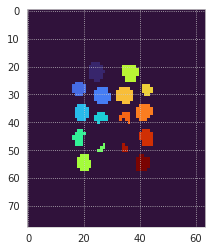

In [28]:
plt.imshow(cortex_labels[:, 8, :], cmap='turbo')

In [32]:
labels = cortex_labels.numpy().astype('uint32')

In [33]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=uint32)

<matplotlib.image.AxesImage object at 0x7e31b6059a90>

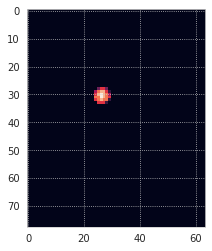

In [38]:
plt.imshow((labels == 5).mean(1))

In [5]:
df_tx, best_tx_yale2ccf = reg.fit_register(
    'test',
    reg.template,
    reg.in_house,
    n_seeds=10,
    grads=[0.2, 0.5, 0.8, 1.2],
    bins=[32, 50],
    types=['SyN'],
)

100%|██████████| 10/10 [15:49<00:00, 94.98s/it]


test, perf:
    seed  grad  bins type      perf
63   128   1.2    50  SyN  0.476228

In [7]:
_df = df_tx.groupby(['type', 'bins', 'grad']).mean().drop(columns=['seed']).unstack()
_df

perf 
 
 
 
 grad 
 0.2 
 0.5 
 0.8 
 1.2 
 
 
 type 
 bins 
 
 
 
 
 
 
 
 
 SyN 
 32 
 0.470191 
 0.472307 
 0.473285 
 0.472945 
 
 
 50 
 0.470450 
 0.472338 
 0.473105 
 0.473711

In [9]:
reg = Register(mice, resolution=200)

In [15]:
tx = ants.registration(
    fixed=reg.template,
    moving=reg.in_house,
    mask=reg.in_house.get_mask(),
    type_of_transform='SyN',
    grad_step=1.2,
    aff_sampling=50,
    random_seed=128,
    verbose=False,
)
warped = ants.apply_transforms(
    fixed=reg.template,
    moving=reg.in_house,
    transformlist=tx['fwdtransforms'],
    interpolator='linear',
)

mi = ants.image_mutual_information(
    reg.template, warped)
mi_base = ants.image_mutual_information(
    reg.template, reg.template)
mi / mi_base

0.4769235380054902

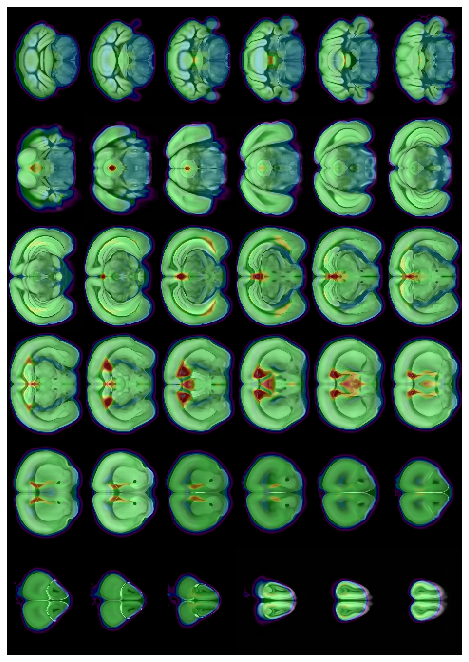

In [16]:
reg.template.plot(
    overlay=warped,
    axis=0,
    nslices=36,
    overlay_alpha=0.4,
    overlay_cmap='nipy_spectral',
)

In [17]:
isocortex = reset_ants_img(mice.allen['isocortex_mask'], dtype=float, spacing=0.1)

In [18]:
iso_inv = ants.apply_transforms(
    fixed=reg.in_house,
    moving=isocortex,
    transformlist=tx['invtransforms'],
    interpolator='genericLabel',
)
iso_inv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (81, 46, 60)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

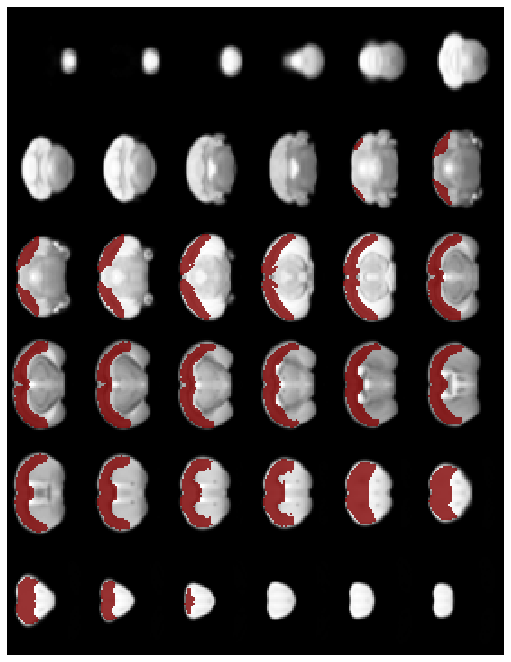

In [19]:
reg.in_house.plot(
    overlay=iso_inv,
    axis=0,
    nslices=36,
    overlay_alpha=0.8,
)

In [23]:
'ca'.upper()

'CA'

In [20]:
list(mice.parcel.results['roi_masks'])

[
    '0-634',
    '1-634',
    '0-17',
    '1-17',
    '0-1007',
    '1-1007',
    '0-1004',
    '1-1004',
    '0-639',
    '1-639',
    '0-122',
    '1-122',
    '0-754',
    '1-754',
    '0-557',
    '1-557',
    '0-1061',
    '1-1061',
    '0-741',
    '1-741',
    '0-141',
    '1-141',
    '0-333',
    '1-333',
    '0-342',
    '1-342',
    '0-589',
    '1-589',
    '0-1117',
    '1-1117',
    '0-599',
    '1-599',
    '0-920',
    '1-920',
    '0-531',
    '1-531',
    '0-339',
    '1-339',
    '0-1033',
    '1-1033',
    '0-814',
    '1-814',
    '0-56',
    '1-56',
    '0-215',
    '1-215',
    '0-978',
    '1-978',
    '0-59',
    '1-59',
    '0-711',
    '1-711',
    '0-946',
    '1-946',
    '0-91',
    '1-91',
    '0-970',
    '1-970',
    '0-445',
    '1-445',
    '0-928',
    '1-928',
    '0-596',
    '1-596',
    '0-370',
    '1-370',
    '0-647',
    '1-647',
    '0-632',
    '1-632',
    '0-188',
    '1-188',
    '0-262',
    '1-262',
    '0-170',
    '1-170',
    '0-101',
    '1-101',
    '0-629',
    '1-629',
    '0-177',
    '1-177',
    '0-507',
    '1-507',
    '0-930',
    '1-930',
    '0-127',
    '1-127',
    '0-951',
    '1-951',
    '0-581',
    '1-581',
    '0-290',
    '1-290',
    '0-987',
    '1-987',
    '0-912',
    '1-912',
    '0-788',
    '1-788',
    '0-423',
    '1-423',
    '0-1084',
    '1-1084',
    '0-1037',
    '1-1037',
    '0-491',
    '1-491',
    '0-944',
    '1-944',
    '0-10704',
    '1-10704',
    '0-303',
    '1-303',
    '0-169',
    '1-169',
    '0-483',
    '1-483',
    '0-989',
    '1-989',
    '0-918',
    '1-918',
    '0-733',
    '1-733',
    '0-159',
    '1-159',
    '0-903',
    '1-903',
    '0-1107',
    '1-1107',
    '0-1044',
    '1-1044',
    '0-926',
    '1-926',
    '0-157',
    '1-157',
    '0-575',
    '1-575',
    '0-310',
    '1-310',
    '0-725',
    '1-725',
    '0-189',
    '1-189',
    '0-319',
    '1-319',
    '0-382',
    '1-382',
    '0-155',
    '1-155',
    '0-957',
    '1-957',
    '0-204',
    '1-204',
    '0-842',
    '1-842',
    '0-207',
    '1-207',
    '0-210',
    '1-210',
    '0-1098',
    '1-1098',
    '0-1039',
    '1-1039',
    '0-26',
    '1-26',
    '0-7',
    '1-7',
    '0-131',
    '1-131',
    '0-907',
    '1-907',
    '0-225',
    '1-225',
    '0-437',
    '1-437',
    '0-209',
    '1-209',
    '0-196',
    '1-196',
    '0-642',
    '1-642',
    '0-311',
    '1-311',
    '0-566',
    '1-566',
    '0-1120',
    '1-1120',
    '0-843',
    '1-843',
    '0-1049',
    '1-1049',
    '0-1041',
    '1-1041',
    '0-96',
    '1-96',
    '0-181',
    '1-181',
    '0-143',
    '1-143',
    '0-1113',
    '1-1113',
    '0-10',
    '1-10',
    '0-1031',
    '1-1031',
    '0-202',
    '1-202',
    '0-846',
    '1-846',
    '0-1139',
    '1-1139',
    '0-564',
    '1-564',
    '0-278',
    '1-278',
    '0-515',
    '1-515',
    '0-422',
    '1-422',
    '0-780',
    '1-780',
    '0-998',
    '1-998',
    '0-429',
    '1-429',
    '0-323',
    '1-323',
    '0-982',
    '1-982',
    '0-105',
    '1-105',
    '0-583',
    '1-583',
    '0-260',
    '1-260',
    '0-1020',
    '1-1020',
    '0-149',
    '1-149',
    '0-672',
    '1-672',
    '0-867',
    '1-867',
    '0-1025',
    '1-1025',
    '0-217',
    '1-217',
    '0-718',
    '1-718',
    '0-525',
    '1-525',
    '0-15',
    '1-15',
    '0-651',
    '1-651',
    '0-27',
    '1-27',
    '0-628',
    '1-628',
    '0-64',
    '1-64',
    '0-968',
    '1-968',
    '0-851',
    '1-851',
    '0-809',
    '1-809',
    '0-250',
    '1-250',
    '0-706',
    '1-706',
    '0-609',
    '1-609',
    '0-258',
    '1-258',
    '0-42',
    '1-42',
    '0-1029',
    '1-1029',
    '0-502',
    '1-502',
    '0-939',
    '1-939',
    '0-942',
    '1-942',
    '0-1077',
    '1-1077',
    '0-186',
    '1-186',
    '0-255',
    '1-255',
    '0-612',
    '1-612',
    '0-1022',
    '1-1022',
    '0-1017',
    '1-1017',
    '0-936',
    '1-936',
    '0-693',
    '1-693',
    '0-366',
    '1-366',
    '0-325',
    '1-32

In [ ]:
## TODO: self.get_atlas_img(moade='3d')
###  returns: cortex, subcortex

In [24]:
list(mice.parcel.results)

[
    'parcel',
    'eroded',
    'mask_l',
    'mask_r',
    'eroded_masks',
    'centers',
    'radius',
    'n_cortical_regions',
    'roi_masks',
    'major_masks',
    'major_colors',
    'cmap'
]

In [32]:
list(mice.parcel.results['roi_masks'])

[
    '0-634',
    '1-634',
    '0-17',
    '1-17',
    '0-1007',
    '1-1007',
    '0-1004',
    '1-1004',
    '0-639',
    '1-639',
    '0-122',
    '1-122',
    '0-754',
    '1-754',
    '0-557',
    '1-557',
    '0-1061',
    '1-1061',
    '0-741',
    '1-741',
    '0-141',
    '1-141',
    '0-333',
    '1-333',
    '0-342',
    '1-342',
    '0-589',
    '1-589',
    '0-1117',
    '1-1117',
    '0-599',
    '1-599',
    '0-920',
    '1-920',
    '0-531',
    '1-531',
    '0-339',
    '1-339',
    '0-1033',
    '1-1033',
    '0-814',
    '1-814',
    '0-56',
    '1-56',
    '0-215',
    '1-215',
    '0-978',
    '1-978',
    '0-59',
    '1-59',
    '0-711',
    '1-711',
    '0-946',
    '1-946',
    '0-91',
    '1-91',
    '0-970',
    '1-970',
    '0-445',
    '1-445',
    '0-928',
    '1-928',
    '0-596',
    '1-596',
    '0-370',
    '1-370',
    '0-647',
    '1-647',
    '0-632',
    '1-632',
    '0-188',
    '1-188',
    '0-262',
    '1-262',
    '0-170',
    '1-170',
    '0-101',
    '1-101',
    '0-629',
    '1-629',
    '0-177',
    '1-177',
    '0-507',
    '1-507',
    '0-930',
    '1-930',
    '0-127',
    '1-127',
    '0-951',
    '1-951',
    '0-581',
    '1-581',
    '0-290',
    '1-290',
    '0-987',
    '1-987',
    '0-912',
    '1-912',
    '0-788',
    '1-788',
    '0-423',
    '1-423',
    '0-1084',
    '1-1084',
    '0-1037',
    '1-1037',
    '0-491',
    '1-491',
    '0-944',
    '1-944',
    '0-10704',
    '1-10704',
    '0-303',
    '1-303',
    '0-169',
    '1-169',
    '0-483',
    '1-483',
    '0-989',
    '1-989',
    '0-918',
    '1-918',
    '0-733',
    '1-733',
    '0-159',
    '1-159',
    '0-903',
    '1-903',
    '0-1107',
    '1-1107',
    '0-1044',
    '1-1044',
    '0-926',
    '1-926',
    '0-157',
    '1-157',
    '0-575',
    '1-575',
    '0-310',
    '1-310',
    '0-725',
    '1-725',
    '0-189',
    '1-189',
    '0-319',
    '1-319',
    '0-382',
    '1-382',
    '0-155',
    '1-155',
    '0-957',
    '1-957',
    '0-204',
    '1-204',
    '0-842',
    '1-842',
    '0-207',
    '1-207',
    '0-210',
    '1-210',
    '0-1098',
    '1-1098',
    '0-1039',
    '1-1039',
    '0-26',
    '1-26',
    '0-7',
    '1-7',
    '0-131',
    '1-131',
    '0-907',
    '1-907',
    '0-225',
    '1-225',
    '0-437',
    '1-437',
    '0-209',
    '1-209',
    '0-196',
    '1-196',
    '0-642',
    '1-642',
    '0-311',
    '1-311',
    '0-566',
    '1-566',
    '0-1120',
    '1-1120',
    '0-843',
    '1-843',
    '0-1049',
    '1-1049',
    '0-1041',
    '1-1041',
    '0-96',
    '1-96',
    '0-181',
    '1-181',
    '0-143',
    '1-143',
    '0-1113',
    '1-1113',
    '0-10',
    '1-10',
    '0-1031',
    '1-1031',
    '0-202',
    '1-202',
    '0-846',
    '1-846',
    '0-1139',
    '1-1139',
    '0-564',
    '1-564',
    '0-278',
    '1-278',
    '0-515',
    '1-515',
    '0-422',
    '1-422',
    '0-780',
    '1-780',
    '0-998',
    '1-998',
    '0-429',
    '1-429',
    '0-323',
    '1-323',
    '0-982',
    '1-982',
    '0-105',
    '1-105',
    '0-583',
    '1-583',
    '0-260',
    '1-260',
    '0-1020',
    '1-1020',
    '0-149',
    '1-149',
    '0-672',
    '1-672',
    '0-867',
    '1-867',
    '0-1025',
    '1-1025',
    '0-217',
    '1-217',
    '0-718',
    '1-718',
    '0-525',
    '1-525',
    '0-15',
    '1-15',
    '0-651',
    '1-651',
    '0-27',
    '1-27',
    '0-628',
    '1-628',
    '0-64',
    '1-64',
    '0-968',
    '1-968',
    '0-851',
    '1-851',
    '0-809',
    '1-809',
    '0-250',
    '1-250',
    '0-706',
    '1-706',
    '0-609',
    '1-609',
    '0-258',
    '1-258',
    '0-42',
    '1-42',
    '0-1029',
    '1-1029',
    '0-502',
    '1-502',
    '0-939',
    '1-939',
    '0-942',
    '1-942',
    '0-1077',
    '1-1077',
    '0-186',
    '1-186',
    '0-255',
    '1-255',
    '0-612',
    '1-612',
    '0-1022',
    '1-1022',
    '0-1017',
    '1-1017',
    '0-936',
    '1-936',
    '0-693',
    '1-693',
    '0-366',
    '1-366',
    '0-325',
    '1-32

In [33]:
mice.parcel.results['eroded'].dtype

dtype('int64')

In [42]:
atlas_subcortex = np.zeros_like(mice.parcel.results['eroded'])
for region, m in mice.parcel.results['roi_masks'].items():
    if str(315) in region:
        continue
    region_i = int(region.split('-')[-1])
    atlas_subcortex[m] = region_i

<matplotlib.image.AxesImage object at 0x7e8b600adf10>

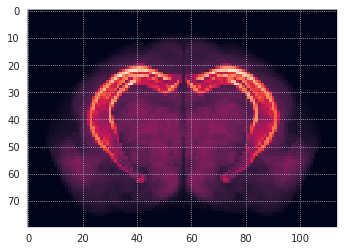

In [43]:
plt.imshow(atlas_subcortex.mean(0))

In [47]:
atlas_subcortex = reset_ants_img(atlas_subcortex, spacing=0.1, dtype='uint32')
atlas_cortex = reset_ants_img(mice.parcel.results['eroded'], spacing=0.1, dtype='uint32')

In [48]:
atlas_subcortex

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [49]:
atlas_cortex

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [50]:
ants.image_write(atlas_cortex, pjoin(mice.cfg.base_dir, 'atlas-cortex_space-CCF.nii.gz'))
ants.image_write(atlas_subcortex, pjoin(mice.cfg.base_dir, 'atlas-subcortex_space-CCF.nii.gz'))

In [5]:
file = pjoin(mice.cfg.masks_dir, f'{key}_space-CCF_atlas3d-inv.npy')
masks = np.load(file, allow_pickle=True).item()
m = reset_ants_img(masks['other']['Isocortex'], dtype=float, spacing=0.2)
m

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [6]:
type(x)

<class 'ants.core.ants_image.ANTsImage'>

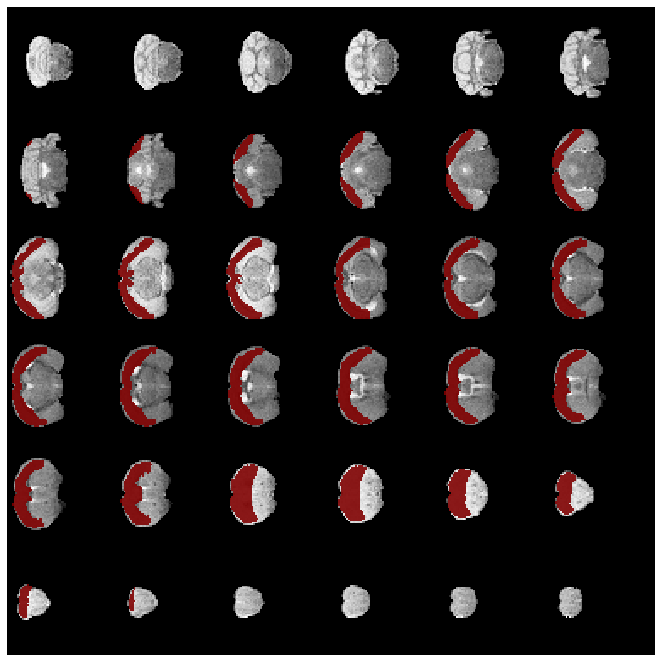

In [6]:
x.plot(
    overlay=m,
    axis=0,
    nslices=36,
)

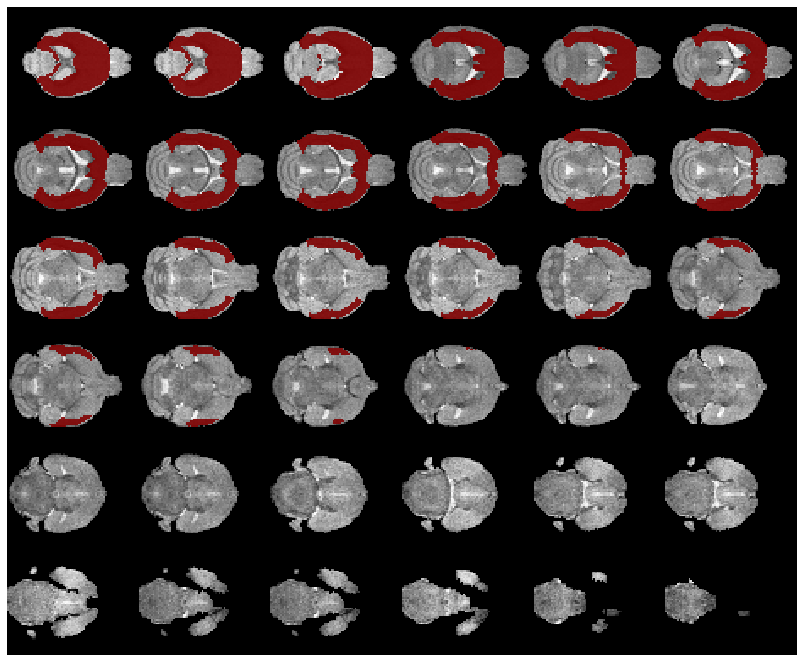

In [7]:
x.plot(
    overlay=m,
    axis=1,
    nslices=36,
)

## Direct register

In [8]:
x = mice.T1w[key].get_data()
x = reorient_arr(x)
x = reset_ants_img(x, spacing=0.2)
x

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [9]:
template = reset_ants_img(mice.allen['template'], dtype=float, spacing=0.1)
template

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [10]:
x[50, 10]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 6934., 8319., 8920., 8703., 8396., 9018., 7510., 7082.,
       7630., 8614., 9287., 8973., 8554., 8759., 8355., 9954., 7870.,
       7338., 8332., 7386., 7477., 8118., 8167., 7183., 8875., 7979.,
       7820., 8740., 8333., 9112., 9558., 9527., 8901., 8148., 6899.,
       6873., 8583., 8531., 8489., 9131., 6943., 5406.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.], dtype=float32)

In [11]:
seeds = [2**i for i in range(10)]

_txs = []
_perf = []
for seed in tqdm(seeds):
    tx = ants.registration(
        fixed=template,
        moving=x,
        mask=x.get_mask(),
        type_of_transform='SyN',
        verbose=True,
        grad_step=0.8,
        random_seed=seed,
    )
    warped = ants.apply_transforms(
        fixed=template,
        moving=x,
        transformlist=tx['fwdtransforms'],
        interpolator='linear',
    )
    mi = ants.image_mutual_information(template, warped)
    mi_base = ants.image_mutual_information(template, template)
    score = mi / mi_base
    print(seed, score)
    _perf.append(score)
    _txs.append(tx)

print(np.argmax(_perf), _perf[np.argmax(_perf)])

  0%|          | 0/10 [00:00<?, ?it/s]

1 0.48359473961611243

 10%|█         | 1/10 [00:24<03:40, 24.48s/it]

2 0.48326119072271173

 20%|██        | 2/10 [00:48<03:15, 24.38s/it]

4 0.4809933313765314

 30%|███       | 3/10 [01:14<02:55, 25.00s/it]

8 0.48302460352714116

 40%|████      | 4/10 [01:36<02:23, 23.98s/it]

16 0.4830285588396591

 50%|█████     | 5/10 [02:07<02:12, 26.46s/it]

32 0.4812997863541607

 60%|██████    | 6/10 [02:37<01:50, 27.60s/it]

64 0.4840579604838745

 70%|███████   | 7/10 [03:06<01:24, 28.01s/it]

128 0.48153564946183613

 80%|████████  | 8/10 [03:33<00:55, 27.69s/it]

256 0.4822008010861889

 90%|█████████ | 9/10 [04:05<00:29, 29.15s/it]

512 0.4827682308693391

100%|██████████| 10/10 [04:35<00:00, 27.59s/it]


6 0.4840579604838745

In [12]:
_perf

[
    0.48359473961611243,
    0.48326119072271173,
    0.4809933313765314,
    0.48302460352714116,
    0.4830285588396591,
    0.4812997863541607,
    0.4840579604838745,
    0.48153564946183613,
    0.4822008010861889,
    0.4827682308693391
]

In [13]:
best_tx = _txs[np.argmax(_perf)]

In [14]:
warped = ants.apply_transforms(
    fixed=template,
    moving=x,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)
mi = ants.image_mutual_information(template, warped)
mi_base = ants.image_mutual_information(template, template)
mi / mi_base

0.4840579604838745

0.48275502822706456

In [15]:
isocortex = reset_ants_img(mice.allen['isocortex_mask'], dtype=float, spacing=0.1)

In [17]:
template_inv = ants.apply_transforms(
    fixed=x,
    moving=template,
    transformlist=best_tx['invtransforms'],
    interpolator='linear',
)
mi = ants.image_mutual_information(x, template_inv)
mi_base = ants.image_mutual_information(x, x)
mi / mi_base

0.5450824836918686

0.5435598943088732

In [20]:
iso_inv = ants.apply_transforms(
    fixed=x,
    moving=isocortex,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)

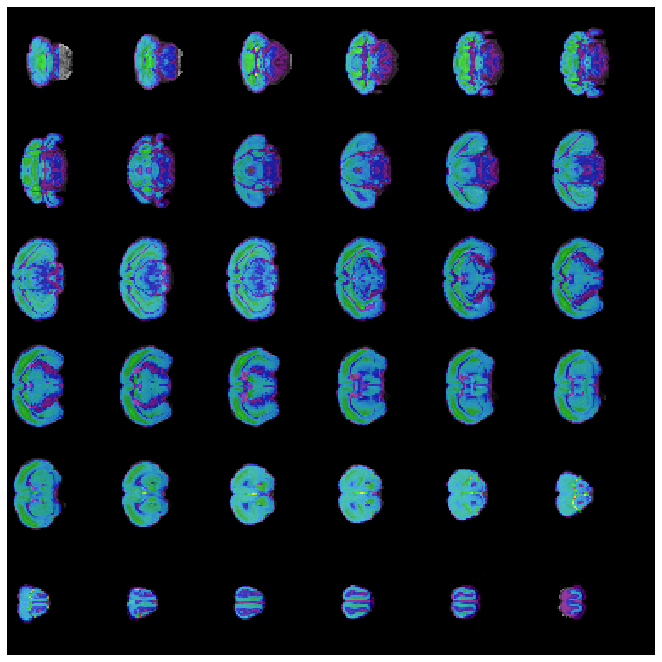

In [21]:
x.plot(
    overlay=template_inv,
    overlay_cmap='nipy_spectral',
    overlay_alpha=0.7,
    nslices=36,
)

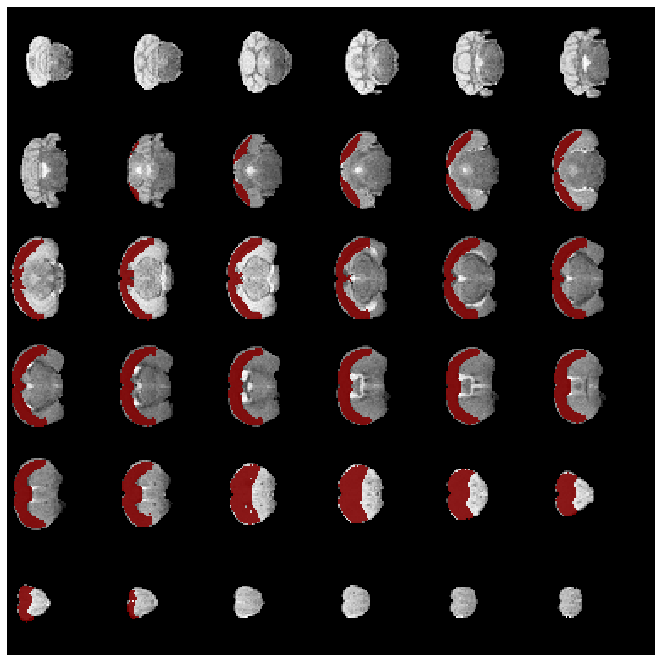

In [22]:
x.plot(
    overlay=iso_inv,
    overlay_cmap='jet',
    nslices=36,
)

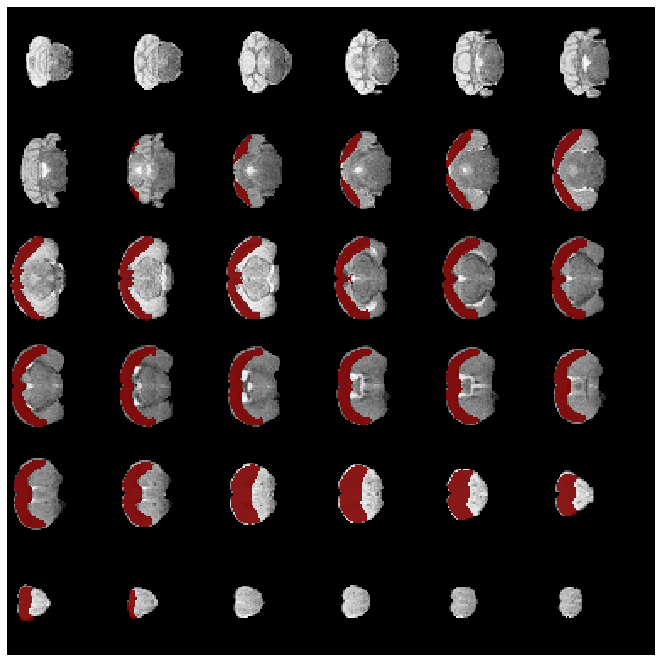

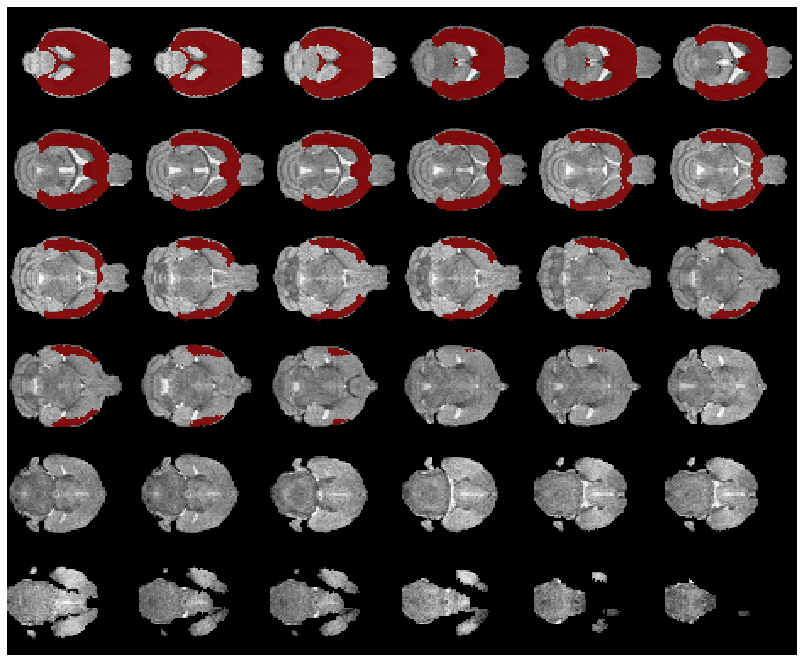

In [23]:
x.plot(
    overlay=iso_inv,
    overlay_cmap='jet',
    nslices=36,
    axis=1,
)

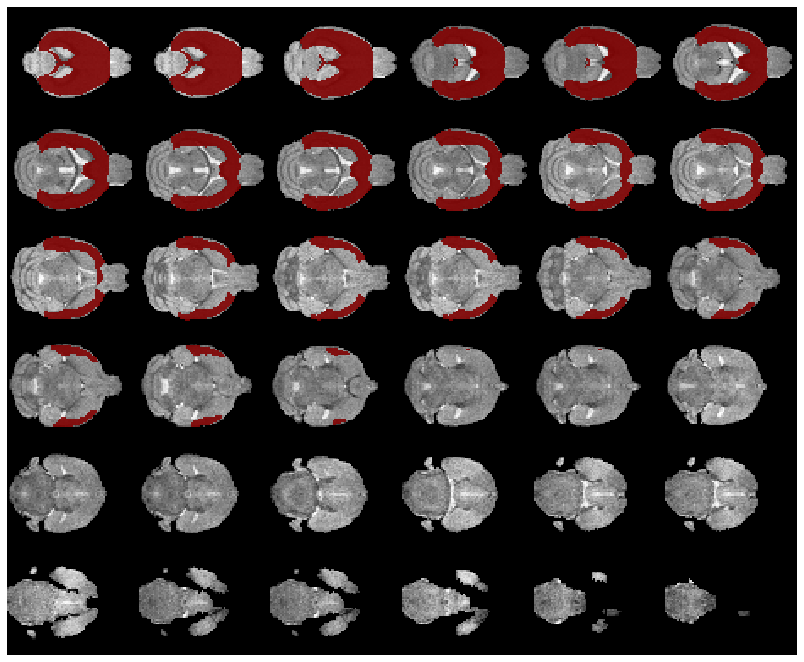

In [ ]:
template.plot(
    overlay=isocortex,
    overlay_cmap='jet',
    nslices=36,
)